<a href="https://colab.research.google.com/github/FrkAk/Deep_Learning_Workshop/blob/master/Workshop/Default_Payment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Define Methods

In [233]:
def read_dataset():
  data = pd.read_csv("dataset.csv",
                  skiprows=1,
                  names=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
                          "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
                          "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
                          "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
                          "default.payment.next.month"])
  data.head()
  return data
  
def get_dimension(names):
  return len(names)


## Split the Dataset

In [249]:
def split(data,test_size):
  from sklearn.model_selection import train_test_split
  train, test = train_test_split(data, test_size=test_size)
  # self.train.head()
  return train,test

### Extract Labels

In [250]:
def extract_features(data,data_names,label_name='default.payment.next.month'):
  features = data[data_names[:-1]].values
  labels = data[label_name].values
  return features,labels

### Convert to NumPy array

In [251]:
def convert_features_frame_to_numpy(frame):
    features = np.array(frame)
    return features

## Model Structure

In [307]:
def create_model(dim):
  model = tf.keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=3,
                  strides=1,
                  activation="relu",
                  padding='causal',
                  input_shape=[dim, 1]),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    # layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Flatten(),
    layers.Dense(1,activation='sigmoid')
  ])
  model.summary()
  return model

In [285]:
def get_model_weights(model):
  return model.get_weights()

## Tune the Learning Rate

It is needed to pick an optimal learning rate.

In [312]:
def tune_learning_rate(model,features,labels):
  # Set the learning rate scheduler
  lr_schedule = tf.keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-8 * 10**(epoch / 20))

  # Initialize the optimizer
  optimizer = tf.keras.optimizers.Adam()

  # Set the training parameters
  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = optimizer,metrics=['accuracy'])

  # Train the model
  history = model.fit(features,labels, epochs=100, callbacks=[lr_schedule])
  return history

In [313]:
def plot_learning_rate(history):
  # Define the learning rate array
  lrs = 1e-8 * (10 ** (np.arange(100) / 20))

  # Set the figure size
  plt.figure(figsize=(10, 6))

  # Set the grid
  plt.grid(True)

  # Plot the loss in log scale
  plt.semilogx(lrs, history.history["loss"])

  # Increase the tickmarks size
  plt.tick_params('both', length=10, width=1, which='both')

  # Set the plot boundaries
  plt.axis([1e-8, 1e-3, 0, 10])

## Train the model

In [320]:
def model_compile(model,init_weights,learning_rate=4e-4):
  # Reset states generated by Keras
  tf.keras.backend.clear_session()

  # Reset the weights
  model.set_weights(init_weights)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
  return model

In [323]:
def train_model(model,features,labels):
  history = model.fit(features, labels, 
                      validation_split=0.2,
                      shuffle = True,
                      epochs=20,)
  return history


In [302]:
def test_model(model,features, labels):
  result = model.evaluate(features, labels)
  return result

In [303]:
def plot_history(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

# MAIN

In [304]:
names_all=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_demographic=["LIMIT_BAL","AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_SEX=["LIMIT_BAL", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_EDU=["LIMIT_BAL",	"SEX",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_MAR=["LIMIT_BAL",	"SEX", "EDUCATION",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_BILL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           
           "default.payment.next.month"]

names_non_PAY_ALL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           
           "default.payment.next.month"]

names_non_BILL_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE","AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           
           "default.payment.next.month"]

names_non_PAY_BILL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE","AGE",
           
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY_BILL_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE", "AGE",
           
           "default.payment.next.month"]

names_only_DEMOGRAPH=["SEX", "EDUCATION","MARRIAGE",	"AGE",
           
           "default.payment.next.month"]


In [326]:
def build_network(data_names,tune=False):
  data = read_dataset()
  dim = get_dimension(data_names) - 1
  train, test = split(data,test_size=0.2)

  train_features, train_labels = extract_features(train,data_names,label_name='default.payment.next.month')
  test_features, test_labels = extract_features(test,data_names,label_name='default.payment.next.month')
  
  train_features = convert_features_frame_to_numpy(train_features)
  test_features = convert_features_frame_to_numpy(test_features)

  train_labels = convert_features_frame_to_numpy(train_labels)
  #train_labels = np.expand_dims(train_labels, axis=0)

  test_labels = convert_features_frame_to_numpy(test_labels)
  #test_labels = np.expand_dims(test_labels, axis=0)

  print("Feature Shape: {}".format(train_features.shape))
  print("Labels Shape: {}".format(train_labels.shape))

  model = create_model(dim)
  init_weights = get_model_weights(model)

  if tune:
    tune_history = tune_learning_rate(model,train_features,train_labels)
    plot_learning_rate(tune_history)
    return tune_history, [0,0], model
  
  else:
    model = model_compile(model,init_weights,learning_rate=8e-5)
    
    history = train_model(model,train_features,train_labels)

    plot_history(history)

    result = test_model(model,test_features, test_labels)

    return history, result, model



## Training

Feature Shape: (24000, 23)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           512       
                                                                 
 dense (Dense)               (None, 23, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 23, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 23, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 368)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 369       
                                                                 
Total 

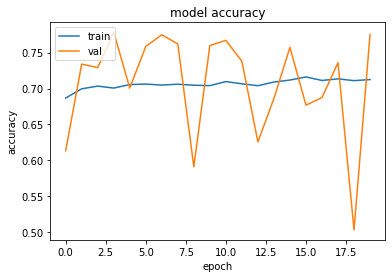

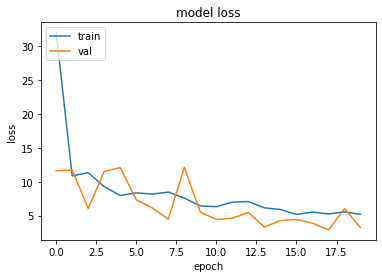

188/188 [==============================] - 2s 12ms/step - loss: 3.6908 - accuracy: 0.7738


In [327]:
all_features_history, all_features_result, all_features_model = build_network(names_all,tune=False)

In [ ]:
non_demographic_features_history, non_demographic_features_result, non_demographic_features_model = build_network(names_non_demographic,tune=False)

Feature Shape: (24000, 20)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 128)           512       
                                                                 
 dense (Dense)               (None, 20, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 20, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 20, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 321       
                                                                 
Total 

In [ ]:
non_SEX_features_history, non_SEX_features_result, non_SEX_features_model = build_network(names_non_SEX,tune=False)

In [ ]:
non_EDU_features_history, non_EDU_features_result, non_EDU_features_model = build_network(names_non_EDU,tune=False)

In [ ]:
non_MAR_features_history, non_MAR_features_result,non_MAR_features_model = build_network(names_non_MAR,tune=False)

In [ ]:
non_PAY_features_history, non_PAY_features_result, non_PAY_features_model = build_network(names_non_PAY,tune=False)

In [ ]:
non_BILL_features_history, non_BILL_features_result,non_BILL_features_model = build_network(names_non_BILL,tune=False)

In [ ]:
non_PAY_AMNT_features_history, non_PAY_AMNT_features_result, non_PAY_AMNT_features_model = build_network(names_non_PAY_AMNT,tune=False)

In [ ]:
non_PAY_ALL_features_history, non_PAY_ALL_features_result,non_PAY_ALL_features_model = build_network(names_non_PAY_ALL,tune=False)

In [ ]:
non_BILL_PAY_AMNT_features_history, non_BILL_PAY_AMNT_features_result,non_BILL_PAY_AMNT_features_model = build_network(names_non_BILL_PAY_AMNT,tune=False)

In [ ]:
non_PAY_BILL_features_history, non_PAY_BILL_features_result,non_PAY_BILL_features_model = build_network(names_non_PAY_BILL,tune=False)

In [ ]:
non_PAY_BILL_PAY_AMNT_features_history, non_PAY_BILL_PAY_AMNT_features_result, non_PAY_BILL_PAY_AMNT_features_model = build_network(names_non_PAY_BILL_PAY_AMNT,tune=False)

In [ ]:
only_DEMOGRAPH_features_history, only_DEMOGRAPH_features_result,only_DEMOGRAPH_features_model = build_network(names_only_DEMOGRAPH,tune=False)

# Result

In this deep learning task, there are five different data are tested. The aim was trying to investigate demographic features' effect on the prediction of default payment for the next month. The result shows us although some accuracy changes are occurring on a different dataset, there is no clear sign of the effect of demographic features changing the prediction since there is no significant accuracy difference. However, The difference increases when we do not count on education level or marital status. This can raise some questions and needs to investigate further to answer accurately. Example researches could be training the same network on different levels of education or marital status to see the exact effect. However, this needs lots of time, and this may be beyond this task since time is limited. To sum up, it can be said that the model acts almost fairly toward different people.

In [198]:
from tabulate import tabulate
print(tabulate([['all_features', {}],
                ['non_demographic_features', {}], 
                ['non_SEX_features', {}],
                ['non_EDU_features', {}],
                ['non_MAR_features', {}],
                ['non_PAY_features', {}],
                ['non_BILL_features', {}],
                ['non_PAY_AMNT_features', {}],
                ['non_PAY_ALL_features', {}],
                ['non_BILL_PAY_AMNT_features', {}],
                ['non_PAY_BILL_features', {}],
                ['non_PAY_BILL_PAY_AMNT_features', {}],
                ['only_DEMOGRAPH_features', {}]], 
               headers=['Dataset Configuration','Result'],floatfmt=".2f").format(all_features_result[1]*100,
                                      non_demographic_features_result[1]*100,
                                      non_SEX_features_result[1]*100,
                                      non_EDU_features_result[1]*100,
                                      non_MAR_features_result[1]*100,
                                      non_PAY_features_result[1]*100,
                                      non_BILL_features_result[1]*100,
                                      non_PAY_AMNT_features_result[1]*100,
                                      non_PAY_ALL_features_result[1]*100,
                                      non_BILL_PAY_AMNT_features_result[1]*100,
                                      non_PAY_BILL_features_result[1]*100,
                                      non_PAY_BILL_PAY_AMNT_features_result[1]*100,
                                      only_DEMOGRAPH_features_result[1]*100))

Dataset Configuration           Result
------------------------------  --------
all_features                    74.52428936958313
non_demographic_features        77.93650031089783
non_SEX_features                67.85363554954529
non_EDU_features                75.86883306503296
non_MAR_features                77.58405804634094
non_PAY_features                77.5009274482727
non_BILL_features               77.91389226913452
non_PAY_AMNT_features           77.24440693855286
non_PAY_ALL_features            77.04306840896606
non_BILL_PAY_AMNT_features      75.93470811843872
non_PAY_BILL_features           76.35834217071533
non_PAY_BILL_PAY_AMNT_features  77.34447717666626
only_DEMOGRAPH_features         78.64664196968079


In [239]:
data_names = names_only_DEMOGRAPH
tune=False
data = read_dataset()
dim = get_dimension(data_names)
data



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [246]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
490,260000.0,2,1,1,34,-1,-1,-1,-1,-1,...,3885.0,4414.0,2514.0,6277.0,4663.0,4140.0,4414.0,2646.0,7725.0,0
10188,170000.0,1,1,2,27,0,0,0,0,0,...,25739.0,30372.0,34924.0,4000.0,5000.0,5000.0,5000.0,5000.0,5000.0,0
1351,50000.0,1,2,2,29,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6966,50000.0,2,3,2,23,0,0,0,0,0,...,29894.0,30125.0,30192.0,1500.0,1467.0,1201.0,1236.0,1103.0,1042.0,0
18725,20000.0,2,2,1,28,-1,-1,0,0,0,...,15991.0,18442.0,18827.0,10094.0,10000.0,1549.0,3000.0,790.0,1000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,160000.0,2,3,1,36,0,0,0,0,2,...,79438.0,72451.0,39831.0,5000.0,10000.0,5018.0,127.0,10015.0,69.0,0
467,220000.0,1,1,2,38,0,0,0,0,0,...,218541.0,167743.0,165300.0,8909.0,7500.0,9000.0,6729.0,6000.0,7009.0,1
4271,170000.0,2,1,1,36,0,0,0,0,0,...,51410.0,52429.0,53554.0,3182.0,3000.0,1990.0,2000.0,2000.0,3000.0,0
4262,30000.0,2,2,2,50,0,0,2,0,0,...,28763.0,29383.0,28987.0,4664.0,0.0,994.0,1047.0,1412.0,756.0,0


In [247]:
label_name='default.payment.next.month'
features = train[data_names[:-1]].values
labels = train[label_name].values
features


array([[ 2,  1,  1, 34],
       [ 1,  1,  2, 27],
       [ 1,  2,  2, 29],
       ...,
       [ 2,  1,  1, 36],
       [ 2,  2,  2, 50],
       [ 2,  3,  3, 60]])

In [275]:
labels = convert_features_frame_to_numpy(labels)
labels = np.expand_dims(labels, axis=0)

In [274]:
print(labels.shape)

(1, 24000)


In [ ]:

train_features = convert_features_frame_to_numpy(train_features)
test_features = convert_features_frame_to_numpy(test_features)

model = create_model(dim)
init_weights = get_model_weights(model)

if tune:
  tune_history = tune_learning_rate(model,train_features,train_labels)
  plot_learning_rate(tune_history)

model = model_compile(model,init_weights,learning_rate=8e-5)

history = train_model(model,train_features,train_labels)

plot_history(history)

result = test_model(model,test_features, test_labels)